In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
df=pd.read_csv("/content/Preprocessed Primary Edu (4).csv")

In [3]:
df.tail()

,Unnamed: 0,Region,Country,Year,Gender,Completion Rate for Primary Edu,Childhood Education GER,"Gross enrolment ratio, early childhood educational development programmes,","Gross intake ratio to the last grade of primary education,",Literacy rate for 25-64 years old,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%)
1693,4390,SDG: Sub-Saharan Africa,Zimbabwe,2018,male,82.40,69.80,0.0,91.15,73.7825,19.040000,2.050000
1694,4391,SDG: Sub-Saharan Africa,Zimbabwe,2019,female,91.62,71.54,0.0,89.32,73.7825,15.022456,4.163666
1695,4392,SDG: Sub-Saharan Africa,Zimbabwe,2019,male,86.36,71.88,0.0,87.70,73.7825,15.022456,4.163666
1696,4393,SDG: Sub-Saharan Africa,Zimbabwe,2020,female,90.10,72.63,0.0,90.90,73.7825,15.670000,4.163666
1697,4394,SDG: Sub-Saharan Africa,Zimbabwe,2020,male,82.80,72.42,0.0,89.14,73.7825,15.670000,4.163666


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 12 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Unnamed: 0                                                                    1698 non-null   int64  
 1   Region                                                                        1698 non-null   object 
 2   Country                                                                       1698 non-null   object 
 3   Year                                                                          1698 non-null   int64  
 4   Gender                                                                        1698 non-null   object 
 5   Completion Rate for Primary Edu                                               1698 non-null   float64
 6   Childhood Education GER         

**Checking for multicollinearity**

<ipython-input-5-6ef11e1d0200>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = predictors.corr()


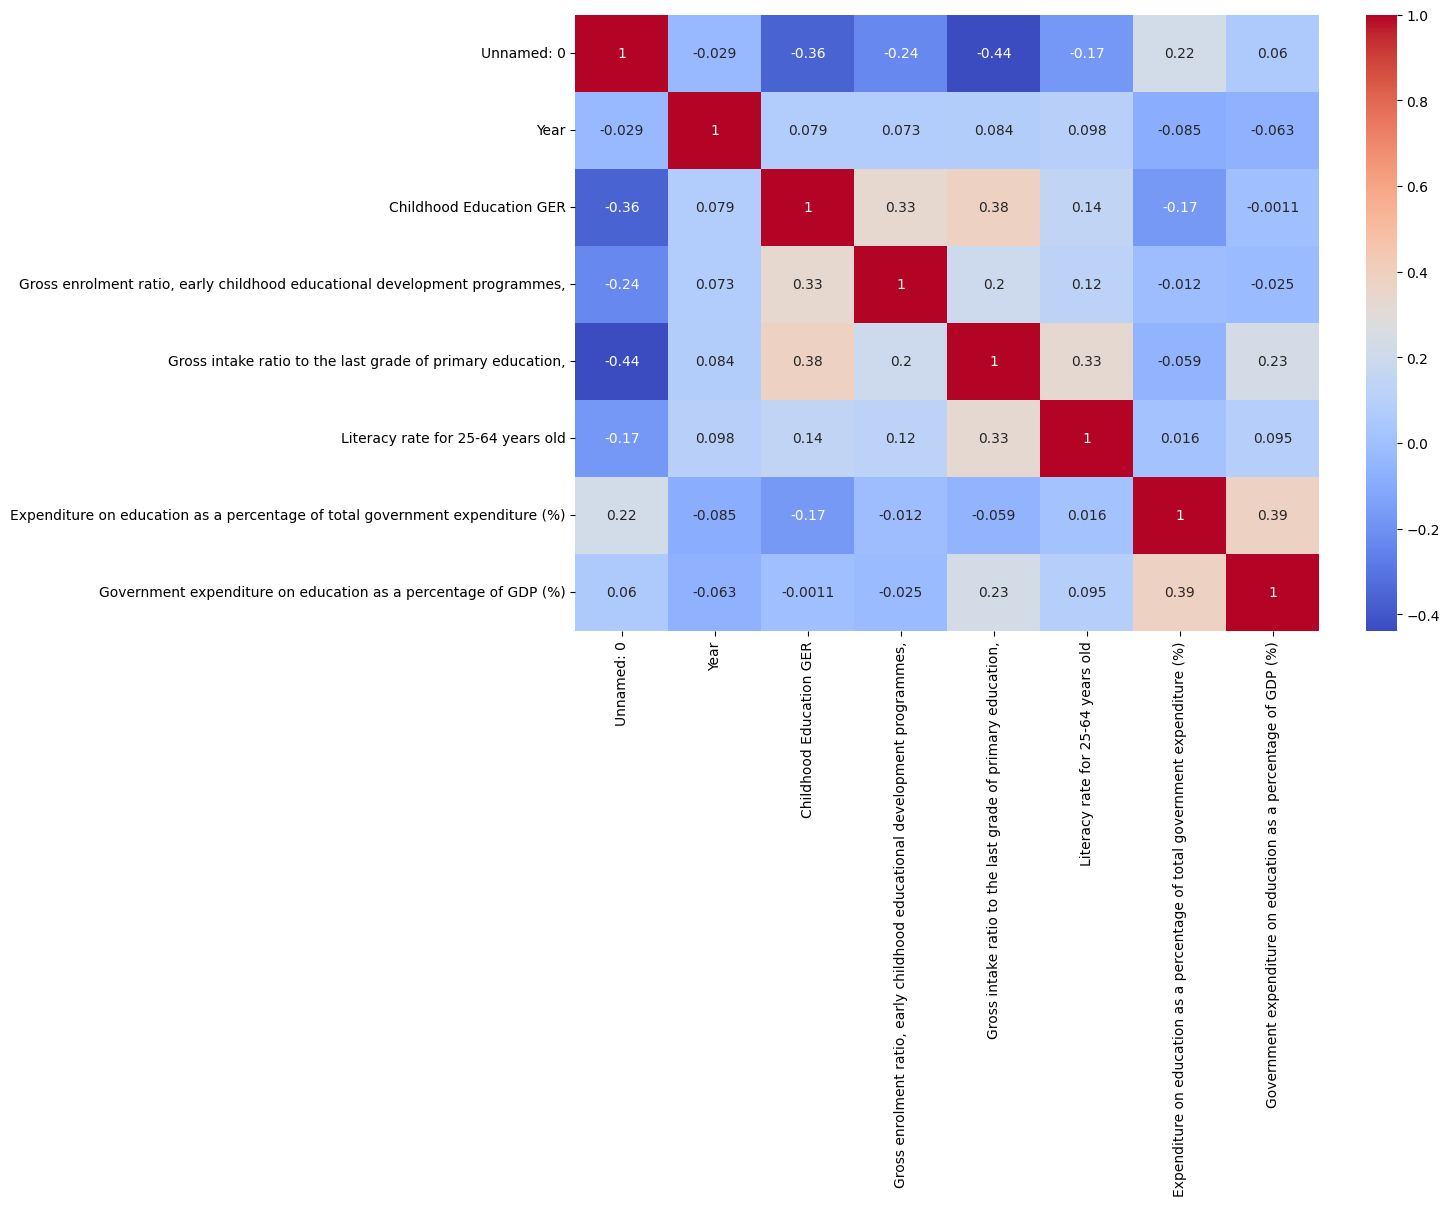

In [5]:
predictors = df.drop("Completion Rate for Primary Edu", axis = 1)
corr = predictors.corr()
#import statsmodels.graphics.api as sm
plt.figure(figsize = (12, 8))
import seaborn as sns
#sm.plot_corr(corr, xnames = list(corr.columns))
sns.heatmap(corr, annot = True, cmap = "coolwarm")
plt.show()

Multicollinearity is considered to be present when the Pearson correlation coefficient exceeds 0.7. However, based on the correlation heatmap analysis provided above, it is clear that there is no indication of multicollinearity among the features.

In [6]:
# Converting the target variable to a floating-point data type.
df["Completion Rate for Primary Edu"] = df["Completion Rate for Primary Edu"].apply(float)
#df["Gross enrolment ratio, early childhood educational development programmes"]= df["Gross enrolment ratio, early childhood educational development programmes"].apply(float)


In [7]:
# Examining the distinct region values.
df["Region"].unique()

array(['SDG: Central and Southern Asia',
       'SDG: Eastern and South-Eastern Asia',
       'SDG: Europe and Northern America',
       'SDG: Latin America and the Caribbean',
       'SDG: Northern Africa and Western Asia', 'SDG: Oceania',
       'SDG: Sub-Saharan Africa'], dtype=object)

In [8]:
# Transforming the categorical "region" column into dummy variables through One-Hot Encoding (OHE)
from sklearn.preprocessing import OneHotEncoder


In [9]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder()
# Fit and transform the encoder on the categorical column
encoded_array = encoder.fit_transform(df[["Region"]]).toarray()
# Create a DataFrame from the encoded array
encoded_df = pd.DataFrame(encoded_array)

In [10]:
# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [11]:
df.head()

,Unnamed: 0,Region,Country,Year,Gender,Completion Rate for Primary Edu,Childhood Education GER,"Gross enrolment ratio, early childhood educational development programmes,","Gross intake ratio to the last grade of primary education,",Literacy rate for 25-64 years old,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%),0,1,2,3,4,5,6
0,98,SDG: Central and Southern Asia,Kazakhstan,2012,female,99.8,46.379381,6.361501,108.19,73.7825,19.25,3.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,99,SDG: Central and Southern Asia,Kazakhstan,2012,male,99.7,46.379381,6.361501,106.88,73.7825,19.25,3.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100,SDG: Central and Southern Asia,Kazakhstan,2013,female,99.9,46.379381,6.361501,109.76,73.7825,17.96,3.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,101,SDG: Central and Southern Asia,Kazakhstan,2013,male,99.8,46.379381,6.361501,108.90,73.7825,17.96,3.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,102,SDG: Central and Southern Asia,Kazakhstan,2014,female,99.9,36.650000,0.000000,115.17,73.7825,17.32,3.42,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Transforming the categorical "Gender" column into dummy variables through mapping
gender_mapping = {'male': 0, 'female': 1}
df['Gender_numerical'] = df['Gender'].map(gender_mapping)

In [13]:
# Updating the names of the newly generated columns after the conversion.
new_column_names = {0:'Central Asia', 1 : 'Central and Southern Asia', 2: 'Eastern and South-Eastern Asia',
                      3: 'Europe and Northern America',  4: 'Latin America and the Caribbean', 5: 'Northern Africa and Western Asia',
                      6 : 'Oceania', 7: 'Southern Asia', 8: 'Sub-Saharan Africa'}

df.rename(columns=new_column_names, inplace=True)

In [14]:
gender_mapping = {'male': 0, 'female': 1}
df['Gender_numerical'] = df['Gender'].map(gender_mapping)

In [15]:
df.head()

,Unnamed: 0,Region,Country,Year,Gender,Completion Rate for Primary Edu,Childhood Education GER,"Gross enrolment ratio, early childhood educational development programmes,","Gross intake ratio to the last grade of primary education,",Literacy rate for 25-64 years old,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%),Central Asia,Central and Southern Asia,Eastern and South-Eastern Asia,Europe and Northern America,Latin America and the Caribbean,Northern Africa and Western Asia,Oceania,Gender_numerical
0,98,SDG: Central and Southern Asia,Kazakhstan,2012,female,99.8,46.379381,6.361501,108.19,73.7825,19.25,3.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,99,SDG: Central and Southern Asia,Kazakhstan,2012,male,99.7,46.379381,6.361501,106.88,73.7825,19.25,3.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100,SDG: Central and Southern Asia,Kazakhstan,2013,female,99.9,46.379381,6.361501,109.76,73.7825,17.96,3.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,101,SDG: Central and Southern Asia,Kazakhstan,2013,male,99.8,46.379381,6.361501,108.90,73.7825,17.96,3.44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,102,SDG: Central and Southern Asia,Kazakhstan,2014,female,99.9,36.650000,0.000000,115.17,73.7825,17.32,3.42,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [16]:
# Removing columns that are not relevant.

columns_to_drop = ['Unnamed: 0', 'Region', 'Country', 'Gender']
df.drop(columns=columns_to_drop, axis= 1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 16 columns):
 #   Column                                                                        Non-Null Count  Dtype  
---  ------                                                                        --------------  -----  
 0   Year                                                                          1698 non-null   int64  
 1   Completion Rate for Primary Edu                                               1698 non-null   float64
 2   Childhood Education GER                                                       1698 non-null   float64
 3   Gross enrolment ratio, early childhood educational development programmes,    1698 non-null   float64
 4   Gross intake ratio to the last grade of primary education,                    1698 non-null   float64
 5   Literacy rate for 25-64 years old                                             1698 non-null   float64
 6   Expenditure on education as a pe

**Features Selections**

Our goal is to find and keep the most important features (variables) that have the strongest impact on our model's ability to make accurate predictions. We accomplish this by utilizing Mutual Information (MI) techniques.

In [18]:
# Import the necessary libraries for mutual information calculation
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression

In [19]:
#seperating the data into dependent and independent variables
X=df.drop(columns= 'Completion Rate for Primary Edu')
y=df['Completion Rate for Primary Edu']


In [20]:
# Dividing the dataset into training and test sets, where the test set size is set to 30 percent of the entire data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
#Training and fitting the model using the training dataset
mutual_info=  mutual_info_regression(X_train, y_train)
mutual_info

array([0.        , 0.32088518, 0.2581516 , 0.37886583, 0.29245292,
       0.18888734, 0.26721868, 0.03714845, 0.02928975, 0.16313579,
       0.12685548, 0.05656411, 0.07770975, 0.26075524, 0.        ])

In [22]:
#Convert the mutual information array into series
mutual_info= pd.Series(mutual_info)
mutual_info.index= X_train.columns
mutual_info.sort_values(ascending=False)


Gross intake ratio to the last grade of primary education,                      0.378866
Childhood Education GER                                                         0.320885
Literacy rate for 25-64 years old                                               0.292453
Government expenditure on education as a percentage of GDP (%)                  0.267219
Oceania                                                                         0.260755
Gross enrolment ratio, early childhood educational development programmes,      0.258152
Expenditure on education as a percentage of total government expenditure (%)    0.188887
Eastern and South-Eastern Asia                                                  0.163136
Europe and Northern America                                                     0.126855
Northern Africa and Western Asia                                                0.077710
Latin America and the Caribbean                                                 0.056564
Central Asia         

The above table is the rank of predictive power(importances) of each feautures using mutual information

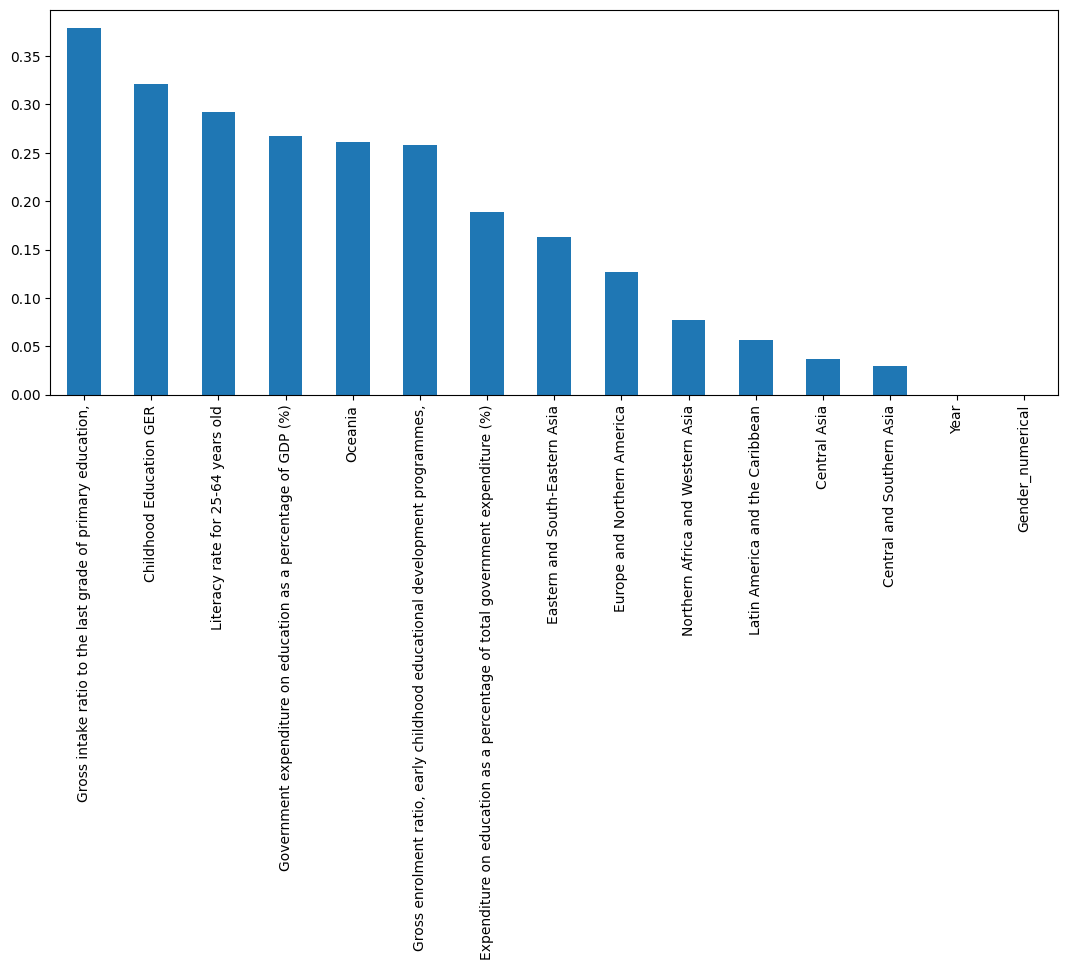

In [23]:
mutual_info.sort_values(ascending=False).plot.bar(figsize= (13,5));

Utilizing the SelectKBest technique from scikit-learn, to select the top 10 most relevant features for constructing your model

In [24]:
from sklearn.feature_selection import SelectKBest

In [25]:
Select_ten_columns = SelectKBest(mutual_info_regression, k=10)
Select_ten_columns.fit(X_train, y_train)
X_train.columns[Select_ten_columns.get_support()]

Index(['Childhood Education GER',
       'Gross enrolment ratio, early childhood educational development programmes,',
       'Gross intake ratio to the last grade of primary education,',
       'Literacy rate for 25-64 years old',
       'Expenditure on education as a percentage of total government expenditure (%)',
       'Government expenditure on education as a percentage of GDP (%)',
       'Eastern and South-Eastern Asia', 'Europe and Northern America',
       'Northern Africa and Western Asia', 'Oceania'],
      dtype='object')

These are the 10th best feautures in the dataset: ['Year', 'Childhood Education GER',
       'Gross enrolment ratio, early childhood educational development programmes',
       'Gross intake ratio to the last grade of lower secondary general education,',
       'Literacy rate for 25-64 years old',
       'Expenditure on education as a percentage of total government expenditure (%)',
       'Government expenditure on education as a percentage of GDP (%)',
       'Europe and Northern America', 'Latin America and the Caribbean',
       'Sub-Saharan Africa']

In [26]:
# Utilizing the StandardScaler for standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_features = scaler.fit_transform(df)

# Create a new DataFrame with standardized features
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

In [27]:
scaled_df.head()

,Year,Completion Rate for Primary Edu,Childhood Education GER,"Gross enrolment ratio, early childhood educational development programmes,","Gross intake ratio to the last grade of primary education,",Literacy rate for 25-64 years old,Expenditure on education as a percentage of total government expenditure (%),Government expenditure on education as a percentage of GDP (%),Central Asia,Central and Southern Asia,Eastern and South-Eastern Asia,Europe and Northern America,Latin America and the Caribbean,Northern Africa and Western Asia,Oceania,Gender_numerical
0,-1.498762,0.912290,0.000000,0.000000,1.337511,-0.195873,1.029583,-0.160401,2.959497,-0.304408,-0.359151,-0.544227,-0.280678,-0.263191,-0.705234,1.0
1,-1.498762,0.907686,0.000000,0.000000,1.246541,-0.195873,1.029583,-0.160401,2.959497,-0.304408,-0.359151,-0.544227,-0.280678,-0.263191,-0.705234,-1.0
2,-1.120732,0.916893,0.000000,0.000000,1.446536,-0.195873,0.715415,-0.440243,2.959497,-0.304408,-0.359151,-0.544227,-0.280678,-0.263191,-0.705234,1.0
3,-1.120732,0.912290,0.000000,0.000000,1.386815,-0.195873,0.715415,-0.440243,2.959497,-0.304408,-0.359151,-0.544227,-0.280678,-0.263191,-0.705234,-1.0
4,-0.742702,0.916893,-0.425774,-0.448128,1.822221,-0.195873,0.559548,-0.452410,2.959497,-0.304408,-0.359151,-0.544227,-0.280678,-0.263191,-0.705234,1.0


In [28]:
df.to_csv("Scaled_Primary.csv ", index=False)